### IBM HR Attrition Analysis

#### Business Objective
IBM wants to identify key factors that lead to employee attrition (voluntary resignation), so that interventions can be made to reduce turnover, improve retention, and lower HR costs.

### 1. Import Libraries

In [84]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder

### 2. Load & Understand the Dataset 

In [86]:
df = pd.read_csv("HR_Employee_Attrition.csv")

In [87]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [88]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [89]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### 3. Data Cleaning & Preprocessing

In [91]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [92]:
df.drop(['EmployeeCount' , 'StandardHours' , 'Over18' , 'EmployeeNumber'], axis=1, inplace=True)  ---   # only 1 value present

In [93]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


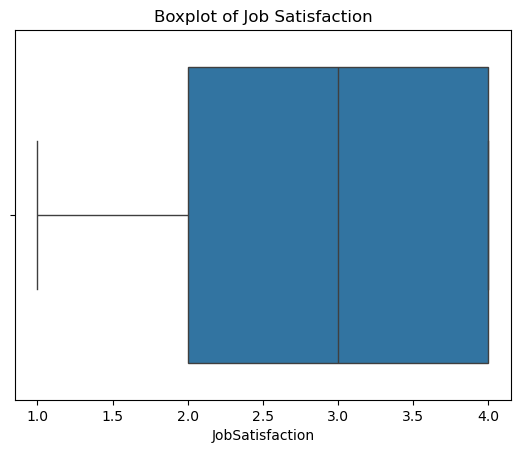

In [94]:
sns.boxplot(x=df['JobSatisfaction'])
plt.title('Boxplot of Job Satisfaction')
plt.show()

### 4. Univariate Analysis

In [96]:
df['Attrition'].value_counts(normalize=True)*100  --- #  Attrition by percentage

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

<Axes: title={'center': 'Attrition Distribution'}, xlabel='Attrition'>

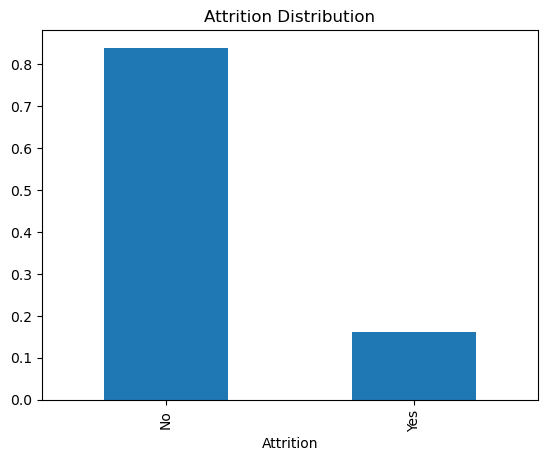

In [97]:
df['Attrition'].value_counts(normalize=True).plot(kind='bar' , title='Attrition Distribution')
  

<Axes: title={'center': 'Job Satisfaction Level'}, xlabel='JobSatisfaction'>

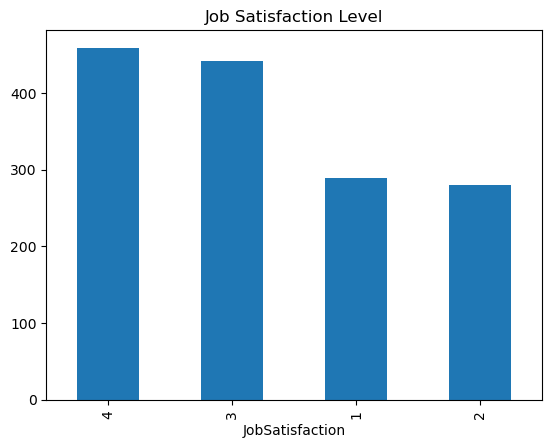

In [155]:
df['JobSatisfaction'].value_counts().plot(kind='bar',title='Job Satisfaction Level')

Text(0.5, 1.0, 'Histogram of Employees Monthly Income')

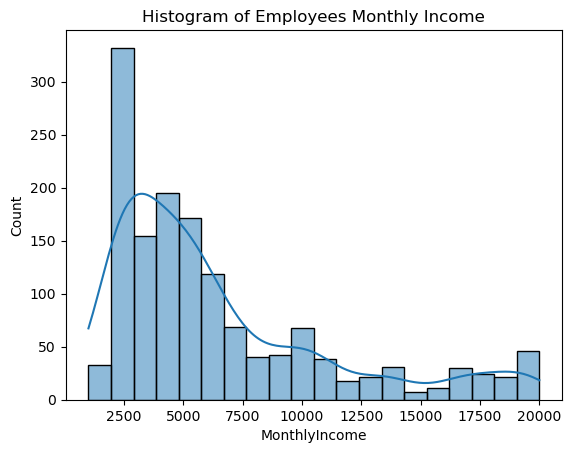

In [159]:
sns.histplot(df['MonthlyIncome'], kde=True)
plt.title('Histogram of Employees Monthly Income')

Text(0.5, 1.0, ' Employees Age Distribution')

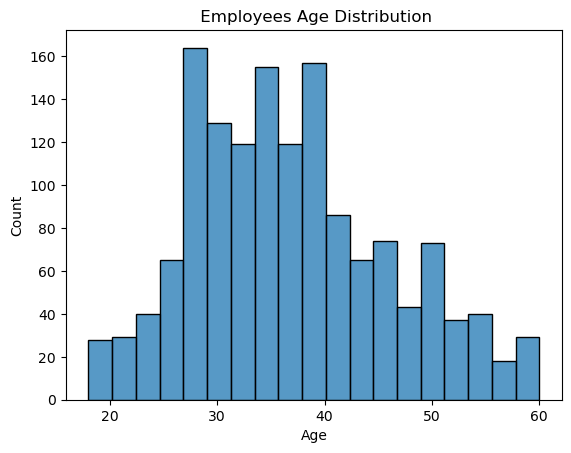

In [163]:
sns.histplot(df['Age'])
plt.title(' Employees Age Distribution')

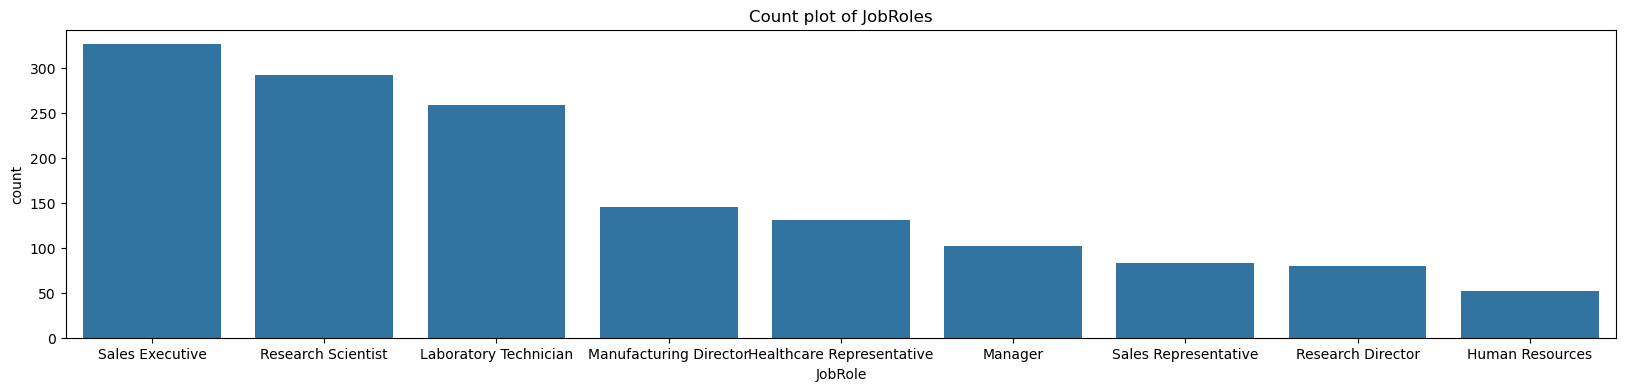

In [101]:
plt.figure(figsize=(20,4))
sns.countplot(x='JobRole',data=df)
plt.title("Count plot of JobRoles")
plt.show()

### 5. Bivariate Analysis

Text(0.5, 1.0, 'Boxplot of Monthly Income and Attrition')

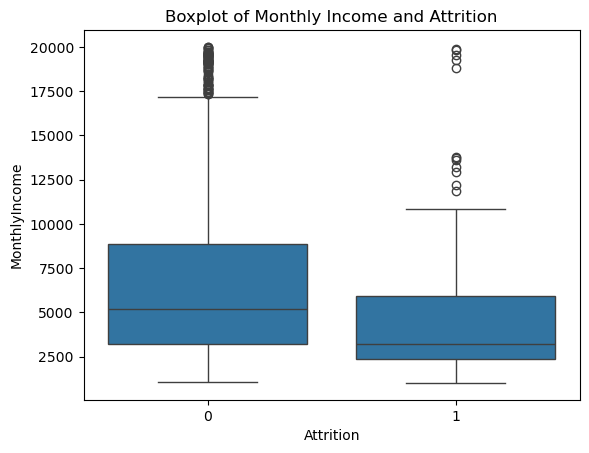

In [165]:
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Boxplot of Monthly Income and Attrition')

Text(0.5, 1.0, 'Attrition Based on Job Role')

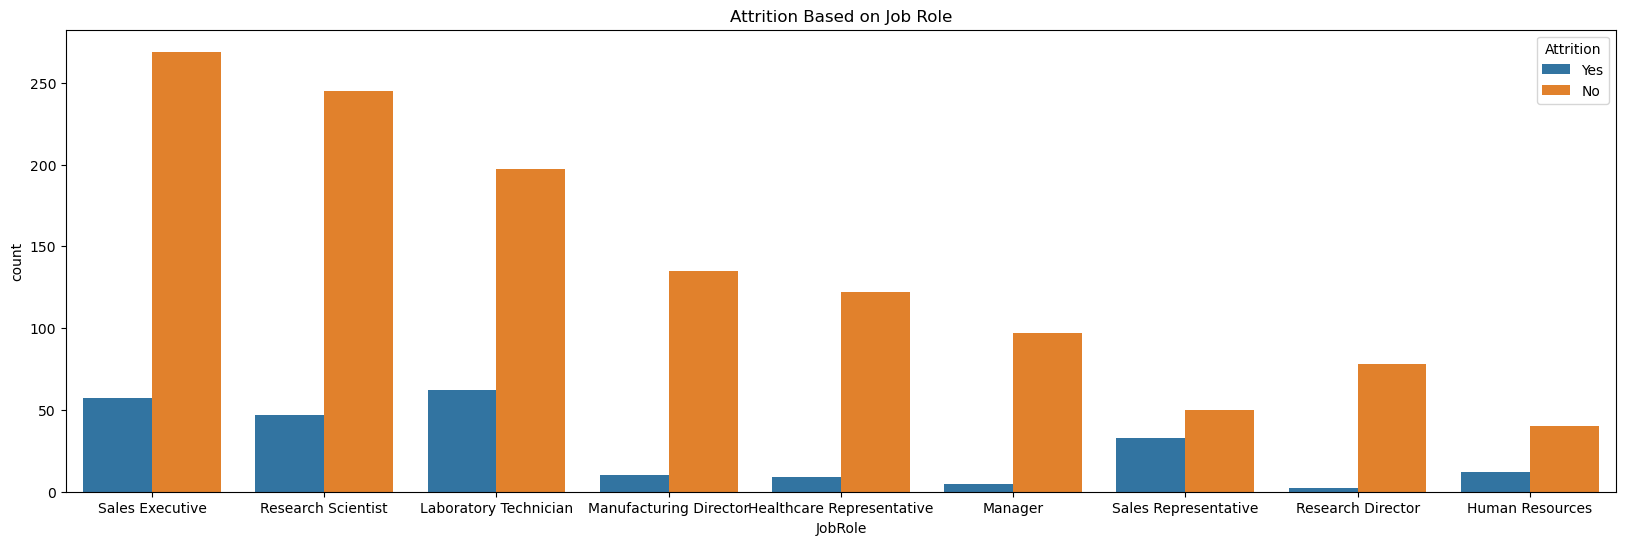

In [104]:
plt.figure(figsize=(20,6))
sns.countplot(x='JobRole', hue='Attrition', data=df)
plt.title('Attrition Based on Job Role')

Text(0.5, 1.0, 'Attrition Based on Job Satisfaction')

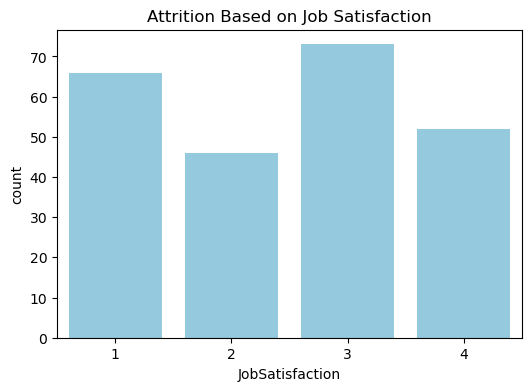

In [105]:
plt.figure(figsize=(6,4))
sns.countplot(x='JobSatisfaction', data=df[df['Attrition'] == 'Yes'], color='skyblue')
plt.title('Attrition Based on Job Satisfaction')

Text(0.5, 1.0, 'Attrition Based on Company Distance from Home')

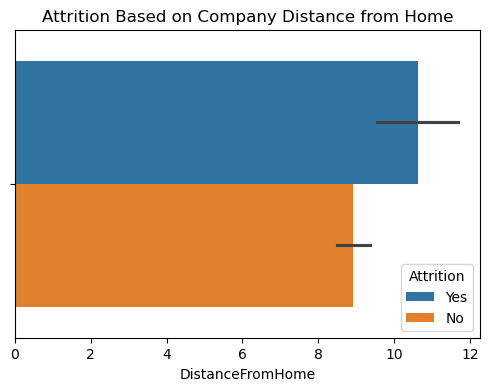

In [106]:
plt.figure(figsize=(6,4))
sns.barplot(x='DistanceFromHome',hue='Attrition',data = df)
plt.title('Attrition Based on Company Distance from Home')

Text(0.5, 1.0, 'Attrition Based on OverTime Work')

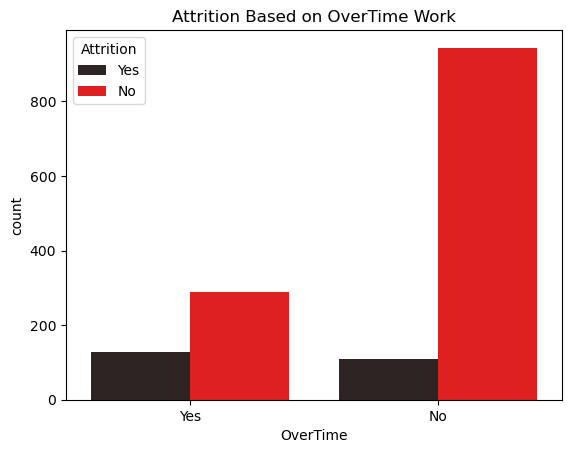

In [107]:
sns.countplot(x='OverTime', hue='Attrition', data=df, color='red')
plt.title('Attrition Based on OverTime Work')

Text(0.5, 1.0, 'Attrition by Gender')

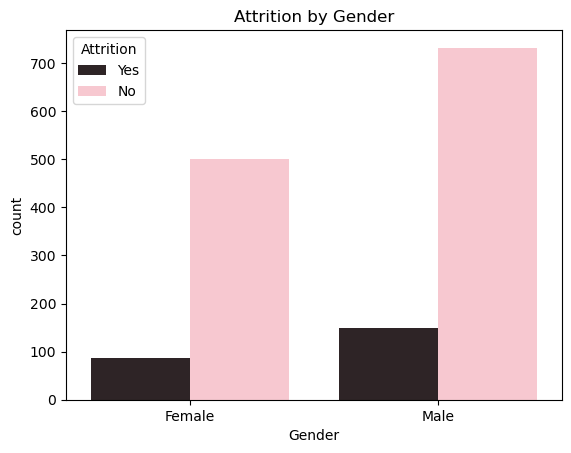

In [108]:
sns.countplot(x='Gender', hue='Attrition', data=df, color='pink')
plt.title('Attrition by Gender')

In [109]:
df.groupby('Attrition')['JobSatisfaction'].mean().round(2) 


Attrition
No     2.78
Yes    2.47
Name: JobSatisfaction, dtype: float64

In [110]:
df.groupby('Attrition')['YearsAtCompany'].mean().round(2)


Attrition
No     7.37
Yes    5.13
Name: YearsAtCompany, dtype: float64

In [111]:
df.groupby('Attrition')['WorkLifeBalance'].mean().round(2)


Attrition
No     2.78
Yes    2.66
Name: WorkLifeBalance, dtype: float64

### 6. Feature Scaling

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

Text(0.5, 1.0, 'Heatmap of Correlation Between Numeric Variables')

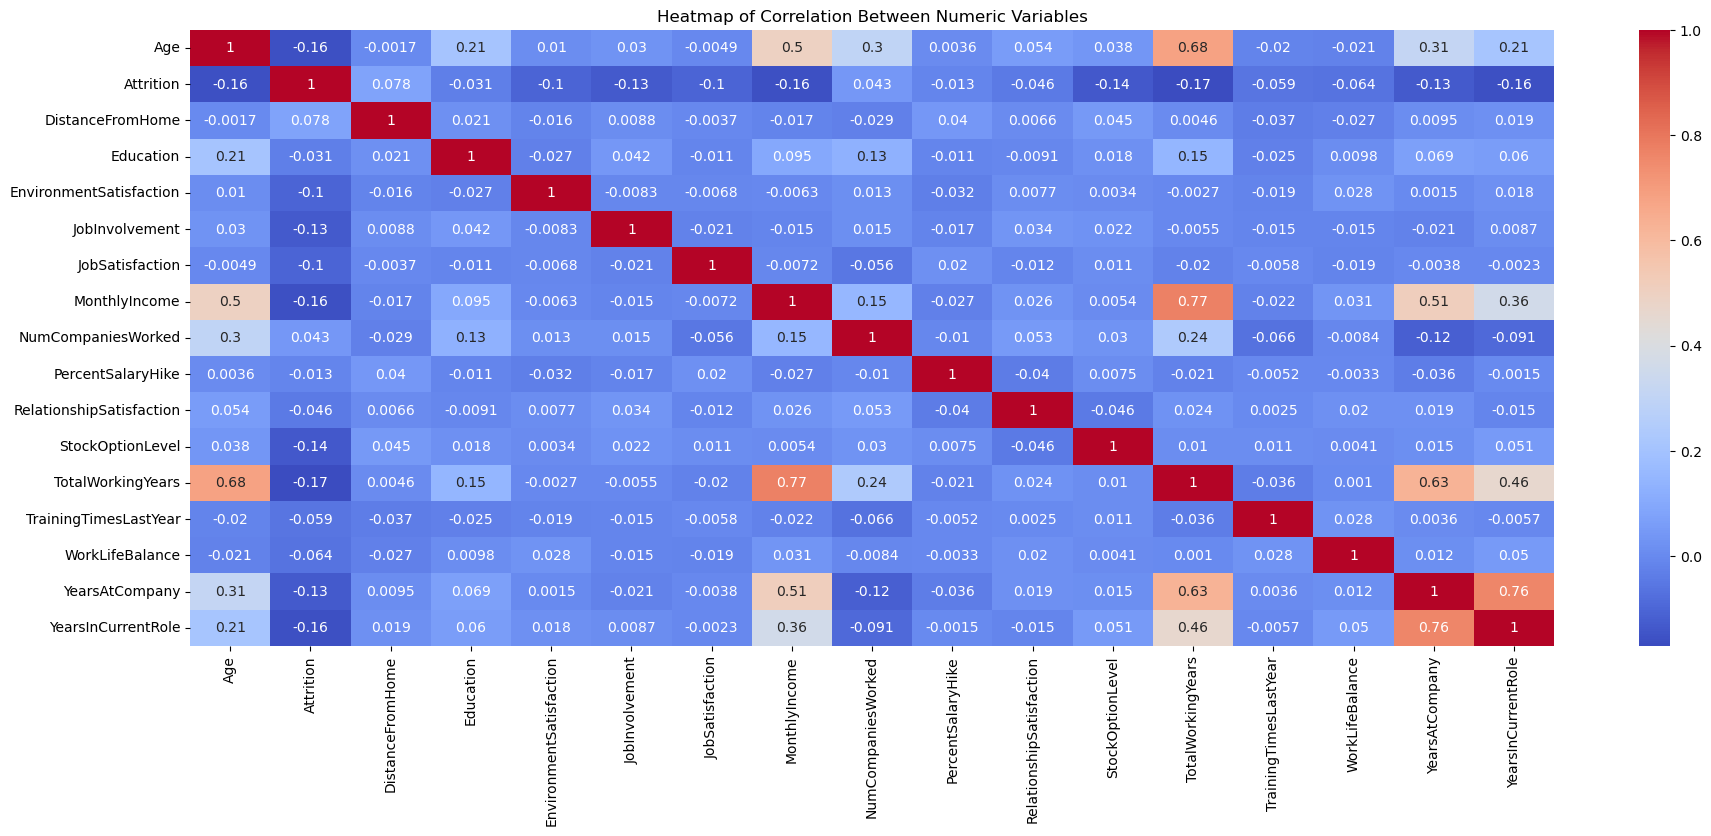

In [169]:
corr=df.select_dtypes(include='number').corr()
plt.figure(figsize=(22,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Heatmap of Correlation Between Numeric Variables')

In [114]:
 df.drop(columns=[
    'JobLevel', 'YearsWithCurrManager','YearsSinceLastPromotion','PerformanceRating','HourlyRate','DailyRate','MonthlyRate'
], inplace=True)            

In [115]:
le = LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

In [117]:
selected_features = ['OverTime', 'JobSatisfaction', 'MonthlyIncome',
                     'EnvironmentSatisfaction', 'WorkLifeBalance',
                     'DistanceFromHome', 'YearsAtCompany']

X = df[selected_features]
y = df['Attrition']


In [118]:
le = LabelEncoder()
X['OverTime'] = le.fit_transform(X['OverTime'])  # Yes = 1, No = 0


### 7. Model Building (Model - Random Forest Classifier)

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8469387755102041


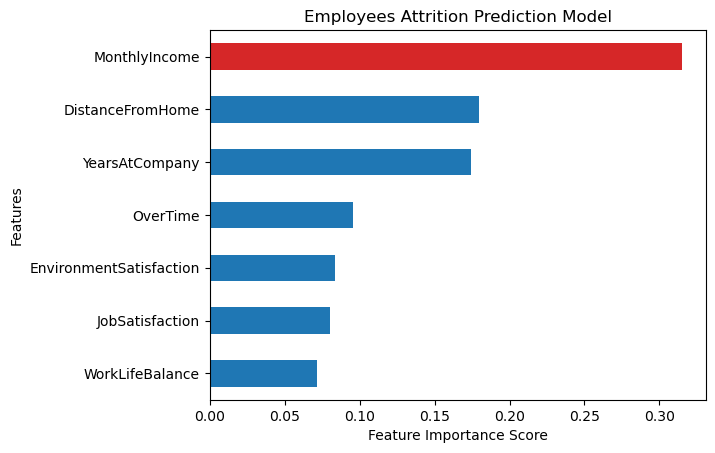

In [175]:
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', title='Feature Importance')
colors = ['#1f77b4' if val < 0.2 else '#d62728' for val in feat_imp.sort_values()]
feat_imp.sort_values().plot(kind='barh', color=colors)
plt.title('Employees Attrition Prediction Model')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


In [ ]:
#  - MonthlyIncome has the highest impact on attrition.
#  - Employees with shorter tenure are more likely to leave.
#  - Distance from home and overtime contribute significantly.

### 8. Final Insights Section (Markdown)

In [ ]:
## Top Findings:
- Employees with low income, long commute, and overtime are more likely to leave.
- Job satisfaction and environment also play a role.

## Recommendations:
- Improve salary structure for low-income bands.
- Offer flexible/remote work for those with long commutes.
- Monitor job satisfaction via regular surveys.
